# Summarizing Data

### Load required Tidyverse packages

In [1]:
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Read in Hurricane Data that was saved as a csv file from a flat file online

In [2]:
hurricane <- read_csv("Data/hurricane_data.csv")
hurricane <- as_tibble(hurricane)
head(hurricane)

Parsed with column specification:
cols(
  .default = col_integer(),
  storm_id = col_character(),
  storm_name = col_character(),
  month = col_character(),
  day = col_character(),
  hour = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  storm_type = col_character(),
  final = col_character()
)
See spec(...) for full column specifications.


storm_id,storm_name,month,day,hour,year,latitude,longitude,max_wind,min_pressure,⋯,radius_50_se,radius_50_sw,radius_50_nw,radius_64_ne,radius_64_se,radius_64_sw,radius_64_nw,storm_type,distance_to_land,final
AL0188,ALBERTO,08,05,18,1988,32.0,77.5,20,1015,⋯,0,0,0,0,0,0,0,*,218,.
AL0188,ALBERTO,08,06,00,1988,32.8,76.2,20,1014,⋯,0,0,0,0,0,0,0,*,213,.
AL0188,ALBERTO,08,06,06,1988,34.0,75.2,20,1013,⋯,0,0,0,0,0,0,0,*,149,.
AL0188,ALBERTO,08,06,12,1988,35.2,74.6,25,1012,⋯,0,0,0,0,0,0,0,*,126,.
AL0188,ALBERTO,08,06,18,1988,37.0,73.5,25,1011,⋯,0,0,0,0,0,0,0,*,197,.
AL0188,ALBERTO,08,07,00,1988,38.7,72.4,25,1009,⋯,0,0,0,0,0,0,0,*,193,.


### Using summarize() function
- Summarize Hurricane Data to find the highest measured maximum wind speed (max_wind) and lowest minimum pressure (min_pressure)
- n() returns number of rows
- Minimum pressure of 0 is unrealistics, means that this data needs to be cleaned up

In [3]:
hurricane %>%
  summarize(n_obs = n(), 
            worst_wind = max(max_wind), 
            worst_pressure = min(min_pressure))

n_obs,worst_wind,worst_pressure
11824,160,0


### Can use summarize() function with other functions as well
- Create a function to convert knots to miles per hour

In [4]:
# Function to convert knots to miles per hour
knots_to_mph <- function(knots){
  mph <- 1.152 * knots
}
# Use function with summarize()
hurricane %>%
  summarize(n_obs = n(), 
            worst_wind = knots_to_mph(max(max_wind)), 
            worst_pressure = min(min_pressure))

n_obs,worst_wind,worst_pressure
11824,184.32,0


# Grouping and Summarizing Data 
- Summarize based on grouped data 
- No visible change when printed as a tibble
- When summarized, data will be summarized based on groups rather than the whole data frame

## Group by Storm name and Year 
- Storm names repeat unless retired, group by Year to get separate Storm names
- Groups will includes all the days and hours of that Storm

In [5]:
hurricane %>%
  group_by(storm_name, year) %>%
  head()

storm_id,storm_name,month,day,hour,year,latitude,longitude,max_wind,min_pressure,⋯,radius_50_se,radius_50_sw,radius_50_nw,radius_64_ne,radius_64_se,radius_64_sw,radius_64_nw,storm_type,distance_to_land,final
AL0188,ALBERTO,08,05,18,1988,32.0,77.5,20,1015,⋯,0,0,0,0,0,0,0,*,218,.
AL0188,ALBERTO,08,06,00,1988,32.8,76.2,20,1014,⋯,0,0,0,0,0,0,0,*,213,.
AL0188,ALBERTO,08,06,06,1988,34.0,75.2,20,1013,⋯,0,0,0,0,0,0,0,*,149,.
AL0188,ALBERTO,08,06,12,1988,35.2,74.6,25,1012,⋯,0,0,0,0,0,0,0,*,126,.
AL0188,ALBERTO,08,06,18,1988,37.0,73.5,25,1011,⋯,0,0,0,0,0,0,0,*,197,.
AL0188,ALBERTO,08,07,00,1988,38.7,72.4,25,1009,⋯,0,0,0,0,0,0,0,*,193,.


### Summarize based on grouping
- Find the highest measured maximum wind speed (max_wind) and lowest minimum pressure (min_pressure) for each storm group (across days and hours of that strom...)


In [6]:
hurricane %>%
  group_by(storm_name, year) %>%
  summarize(n_obs = n(), 
            worst_wind = max(max_wind), 
            worst_pressure = min(min_pressure))

storm_name,year,n_obs,worst_wind,worst_pressure
ALBERTO,1988,13,35,1002
ALBERTO,1994,31,55,993
ALBERTO,2000,87,110,950
ALBERTO,2006,37,60,969
ALBERTO,2012,20,50,995
ALEX,1998,26,45,1002
ALEX,2004,25,105,957
ALEX,2010,30,90,948
ALLISON,1989,28,45,999
ALLISON,1995,33,65,982


### Can use Grouping and Summarizing to quickly plot summaries of the datasets:
- Plot as Wind Speed vs Count
- From the Plot, can see that only 2 Stroms had winds higher than 160

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


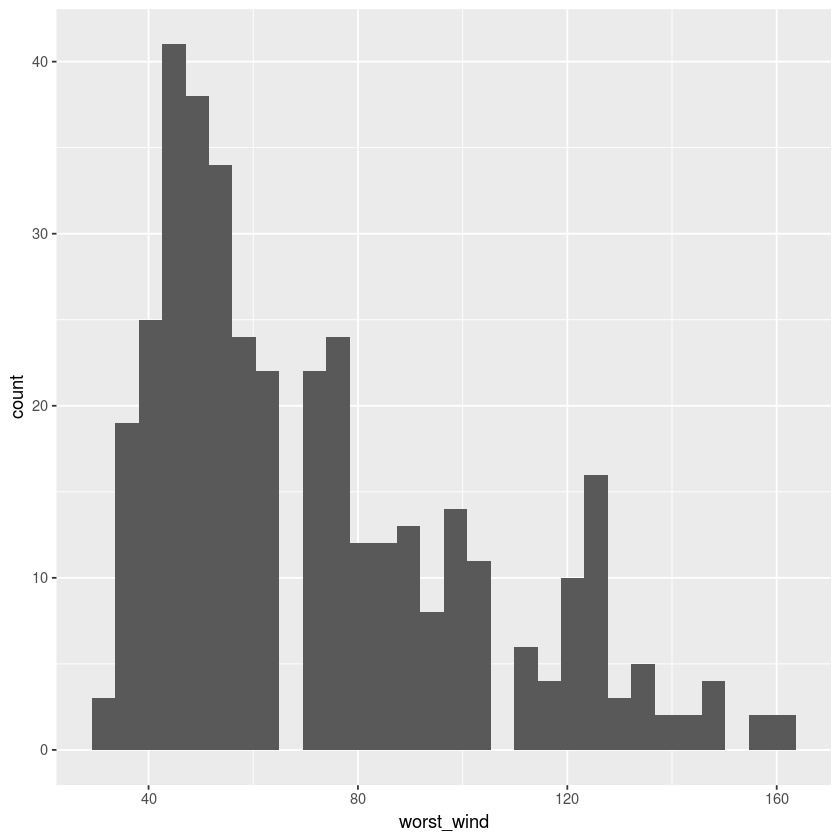

In [7]:
hurricane %>%
  group_by(storm_name, year) %>%
  summarize(n_obs = n(), 
            worst_wind = max(max_wind), 
            worst_pressure = min(min_pressure)) %>%
  ggplot(aes(x=worst_wind)) + geom_histogram()

### Filter out the Storms that had winds higher than 160:
- Only Gilbert (1998) and Wilma (2005) had 160 knots winds

In [8]:
hurricane %>%
  group_by(storm_name, year) %>%
  summarize(n_obs = n(), 
            worst_wind = max(max_wind)) %>%
  filter(worst_wind >= 160)

storm_name,year,n_obs,worst_wind
GILBERT,1988,46,160
WILMA,2005,45,160


In [10]:
hurricane %>%
  group_by(storm_name, year) %>%
  summarize(n_obs = n(), 
            worst_wind = max(max_wind)) %>%
  filter(worst_wind >= 140)

storm_name,year,n_obs,worst_wind
ANDREW,1992,47,150
DEAN,2007,40,150
EMILY,2005,43,140
FELIX,2007,26,150
GILBERT,1988,46,160
HUGO,1989,61,140
ISABEL,2003,57,145
IVAN,2004,87,145
KATRINA,2005,31,150
MITCH,1998,76,155
